# Top Token Identification : Porter Stemmer, Lancaster Stemming, and Lemmatization

**Author - Lasya Nayani Bhatta**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [6]:
file_path = 'C:/Users/MANOJ/Downloads/Food_Inspections_20240106.csv'

In [7]:
data = pd.read_csv(file_path)
data

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2587633,TACOS MARIO'S LIMITED,TACOS MARIO'S LIMITED,1447643.0,Restaurant,Risk 1 (High),4540 W 63RD ST,CHICAGO,IL,60629.0,1/4/2024,Non-Inspection,No Entry,NaN,41.778606,-87.736592,"(41.77860614662516, -87.73659163763277)"
1,2587625,"TAQUERIA EL ARCO #3 EL POLLO FELIZ, INC.",EL POLLO CRIS CRIS #3,1964458.0,Restaurant,Risk 1 (High),7023-7025 S PULASKI RD,CHICAGO,IL,60629.0,1/4/2024,Canvass,Out of Business,NaN,41.765126,-87.722279,"(41.765126421774134, -87.72227898862089)"
2,2587598,Tel Aviv Slices Pizza LLC,Tel Aviv Slices Pizza LLC,2948183.0,NaN,Risk 1 (High),3517 W DEVON AVE,CHICAGO,IL,60659.0,1/4/2024,License,Not Ready,NaN,41.997177,-87.717388,"(41.99717696905116, -87.71738760229222)"
3,2587596,KENSINGTON SCHOOL OF LINCOLN PARK,KENSINGTON SCHOOL OF LINCOLN PARK,2944036.0,Children's Services Facility,Risk 1 (High),2745 N LINCOLN AVE,CHICAGO,IL,60614.0,1/4/2024,License,Pass,NaN,41.931779,-87.657407,"(41.93177936843524, -87.65740695216547)"
4,2587599,Q'S AUTHENTIC COOKING,Q'S AUTHENTIC COOKING,2757521.0,Restaurant,Risk 1 (High),306 E 75TH ST,CHICAGO,IL,60619.0,1/4/2024,Canvass,Pass,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",41.758467,-87.617974,"(41.75846743102775, -87.61797380173462)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265648,78350,"ACE'S SOUL FOOD CAFE, INC.","ACE'S SOUL FOOD CAFE, INC.",1904903.0,Restaurant,Risk 1 (High),432 E 63RD ST,CHICAGO,IL,60637.0,3/16/2010,Complaint,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.780371,-87.614355,"(41.78037142154735, -87.61435452532793)"
265649,60350,PROVIDENCE ST. MEL SCHOOL,PROVIDENCE ST. MEL SCHOOL,2040661.0,School,Risk 1 (High),119 S CENTRAL PARK AVE,CHICAGO,IL,60624.0,3/8/2010,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.878902,-87.715683,"(41.878902061837714, -87.71568319419137)"
265650,78264,"JAMAICA JERK SPICE, INC","JAMAICA JERK SPICE, INC",1909392.0,Restaurant,Risk 1 (High),6500 S COTTAGE GROVE AVE,CHICAGO,IL,60637.0,1/19/2010,Complaint,Pass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.776685,-87.605994,"(41.776684614718135, -87.60599357890983)"
265651,114374,NACIONAL 27/TALLBOY TACO,NACIONAL 27/TALLBOY TACO,80711.0,Restaurant,Risk 1 (High),325 W HURON ST,CHICAGO,IL,60654.0,3/16/2010,Canvass,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.894646,-87.636788,"(41.8946456460705, -87.63678754035266)"


**1. Filter the data for failed inspections and only keep records where Violations description is not blank.**

In [8]:
InspectionFail = data[(data['Results'] == 'Fail') & data['Violations'].notna()]

In [9]:
num_records = len(InspectionFail)
num_records

48413

In [10]:
InspectionFail['Violations'] = InspectionFail['Violations'].str.split('\|')
InspectionFail = InspectionFail.explode('Violations')

C:\Users\MANOJ\AppData\Local\Temp\ipykernel_22072\2332584985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  InspectionFail['Violations'] = InspectionFail['Violations'].str.split('\|')


In [11]:
InspectionFail.head(5)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
42,2587039,"SORA TEMAKERIA, LLC","SORA TEMAKERIA, LLC",2569202.0,Restaurant,Risk 1 (High),3508 W 26TH ST,CHICAGO,IL,60623.0,12/15/2023,Canvass Re-Inspection,Fail,59. PREVIOUS PRIORITY FOUNDATION VIOLATION COR...,41.844516,-87.712776,"(41.84451619427469, -87.71277572197552)"
46,2586974,CAFE 1850,CAFE 1850,2590022.0,Restaurant,Risk 1 (High),1850 W ROOSEVELT RD,CHICAGO,IL,60608.0,12/14/2023,Canvass,Fail,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.866906,-87.673316,"(41.86690583756181, -87.6733159162735)"
46,2586974,CAFE 1850,CAFE 1850,2590022.0,Restaurant,Risk 1 (High),1850 W ROOSEVELT RD,CHICAGO,IL,60608.0,12/14/2023,Canvass,Fail,58. ALLERGEN TRAINING AS REQUIRED - Comments:...,41.866906,-87.673316,"(41.86690583756181, -87.6733159162735)"
56,2586823,ALL ABOUT KIDS LEARNING ACADEMY,ALL ABOUT KIDS LEARNING ACADEMY,2384881.0,Children's Services Facility,Risk 1 (High),504-516 E 75TH ST,CHICAGO,IL,60619.0,12/12/2023,Canvass,Fail,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.758567,-87.612451,"(41.758566800153645, -87.61245073862713)"
56,2586823,ALL ABOUT KIDS LEARNING ACADEMY,ALL ABOUT KIDS LEARNING ACADEMY,2384881.0,Children's Services Facility,Risk 1 (High),504-516 E 75TH ST,CHICAGO,IL,60619.0,12/12/2023,Canvass,Fail,36. THERMOMETERS PROVIDED & ACCURATE - Commen...,41.758567,-87.612451,"(41.758566800153645, -87.61245073862713)"


In [12]:
InspectionFail.shape

(320420, 17)

**2. Using regex, separate the violation description and comments into separate data frame columns.**

In [38]:
import re
import pandas as pd

regex = re.compile(r"(?P<Code>[\d.]+)\s(?P<Description>.*?)\s-\sComments:\s(?P<Comments>.*)")
def clean_violations(violations):
    if isinstance(violations, str):  # Check if the input is a string
        match = regex.search(violations)
        if match:
            # Extract the "Description" and "Comments" groups from the regular expression match
            description = match.group("Description").strip()
            comments = match.group("Comments").strip()
            return description, comments
    return "", ""

In [39]:
InspectionFail[['Description', 'Comments']] = InspectionFail['Violations'].apply(clean_violations).apply(pd.Series)
# Drop the 'Violations' column if you no longer need it
#InspectionFail = InspectionFail.drop('Violations', axis=1)

#print(InspectionFail)

In [40]:
InspectionFail.head(5)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,...,Violations,Latitude,Longitude,Location,Description,Comments,tokens_description,tokens_comments,cleaned_tokens_description,cleaned_tokens_comments
0,2587039,"SORA TEMAKERIA, LLC","SORA TEMAKERIA, LLC",2569202.0,Restaurant,Risk 1 (High),3508 W 26TH ST,CHICAGO,IL,60623.0,...,59. PREVIOUS PRIORITY FOUNDATION VIOLATION COR...,41.844516,-87.712776,"(41.84451619427469, -87.71277572197552)",PREVIOUS PRIORITY FOUNDATION VIOLATION CORRECTED,PREVIOUS PRIORITY FOUNDATION NOT CORRECTED FRO...,"[PREVIOUS, PRIORITY, FOUNDATION, VIOLATION, CO...","[PREVIOUS, PRIORITY, FOUNDATION, NOT, CORRECTE...","[previous, priority, foundation, violation, co...","[previous, priority, foundation, corrected, re..."
1,2586974,CAFE 1850,CAFE 1850,2590022.0,Restaurant,Risk 1 (High),1850 W ROOSEVELT RD,CHICAGO,IL,60608.0,...,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.866906,-87.673316,"(41.86690583756181, -87.6733159162735)",ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED A...,FOUND CUSTOMER AND EMPLOYEE WOMEN'S AND MEN'S ...,"[ADEQUATE, HANDWASHING, SINKS, PROPERLY, SUPPL...","[FOUND, CUSTOMER, AND, EMPLOYEE, WOMEN, 'S, AN...","[adequate, handwashing, sinks, properly, suppl...","[found, customer, employee, women, men, toilet..."
2,2586974,CAFE 1850,CAFE 1850,2590022.0,Restaurant,Risk 1 (High),1850 W ROOSEVELT RD,CHICAGO,IL,60608.0,...,58. ALLERGEN TRAINING AS REQUIRED - Comments:...,41.866906,-87.673316,"(41.86690583756181, -87.6733159162735)",ALLERGEN TRAINING AS REQUIRED,FOUND CITY OF CHICAGO FOOD SERVICE MANAGER WIT...,[],[],[],[]
3,2586823,ALL ABOUT KIDS LEARNING ACADEMY,ALL ABOUT KIDS LEARNING ACADEMY,2384881.0,Children's Services Facility,Risk 1 (High),504-516 E 75TH ST,CHICAGO,IL,60619.0,...,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.758567,-87.612451,"(41.758566800153645, -87.61245073862713)",ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED A...,OBSERVED HOT RUNNING WATER TEMPERATURE AT HAND...,"[ADEQUATE, HANDWASHING, SINKS, PROPERLY, SUPPL...","[OBSERVED, HOT, RUNNING, WATER, TEMPERATURE, A...","[adequate, handwashing, sinks, properly, suppl...","[observed, hot, running, water, temperature, h..."
4,2586823,ALL ABOUT KIDS LEARNING ACADEMY,ALL ABOUT KIDS LEARNING ACADEMY,2384881.0,Children's Services Facility,Risk 1 (High),504-516 E 75TH ST,CHICAGO,IL,60619.0,...,36. THERMOMETERS PROVIDED & ACCURATE - Commen...,41.758567,-87.612451,"(41.758566800153645, -87.61245073862713)",THERMOMETERS PROVIDED & ACCURATE,MUST PROVIDE THERMOMETER FOR REFRIGERATOR IN C...,[],[],[],[]


In [41]:
# Drop the 'Violations' column if you no longer need it
#InspectionFail = InspectionFail.drop('Violations', axis=1)

In [12]:
#InspectionFail = InspectionFail.dropna(subset=['Description', 'Comments'])

**3. Tokenize violation description and comment columns**

In [42]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [43]:
!pip install tqdm


Defaulting to user installation because normal site-packages is not writeable


In [44]:
import nltk as nltk

In [45]:
from nltk.tokenize import word_tokenize

In [46]:
from tqdm import tqdm

In [47]:
InspectionFail = InspectionFail.reset_index(drop=True)

In [48]:
InspectionFail['Description'] = InspectionFail['Description'].astype(str)
InspectionFail['Comments'] = InspectionFail['Comments'].astype(str)

In [49]:
tqdm.pandas()
InspectionFail['tokens_description'] = InspectionFail['Description'].progress_apply(word_tokenize)
InspectionFail['tokens_comments'] = InspectionFail['Comments'].progress_apply(word_tokenize)

100%|██████████| 320420/320420 [02:39<00:00, 2003.97it/s]


**4. Find top-10 tokens of each column**


In [50]:
from nltk import FreqDist

In [51]:
top_10_tokens_description = InspectionFail['tokens_description'].explode().value_counts().head(10)
top_10_tokens_comments = InspectionFail['tokens_comments'].explode().value_counts().head(10)

In [52]:
print("Top 10 Tokens in 'violations_description':")
top_10_tokens_description




Top 10 Tokens in 'violations_description':


,              371497
AND            172554
:              128673
MAINTAINED      89070
FOOD            89065
&               80027
PROPERLY        74328
CLEAN           71258
INSTALLED       69061
CONSTRUCTED     68148
Name: tokens_description, dtype: int64

In [53]:
print("\nTop 10 Tokens in 'violations_comments':")
top_10_tokens_comments


Top 10 Tokens in 'violations_comments':


.             737834
AND           375064
,             356067
THE           277663
IN            250658
TO            239880
OF            162239
MUST          151551
ON            143199
INSTRUCTED    131230
Name: tokens_comments, dtype: int64

**5. Clean each column: convert to lower case, remove stopwords, punctuation, numbers, etc**

In [54]:
import string
from nltk.corpus import stopwords

In [55]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MANOJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
# Convert to lowercase
InspectionFail['cleaned_tokens_description'] = InspectionFail['tokens_description'].apply(lambda tokens: [token.lower() for token in tokens])

# Remove stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation_table = str.maketrans('', '', string.punctuation)
InspectionFail['cleaned_tokens_description'] = InspectionFail['cleaned_tokens_description'].apply(lambda tokens: [token for token in tokens if token.isalpha() and token not in stop_words])
InspectionFail['cleaned_tokens_description'] = InspectionFail['cleaned_tokens_description'].apply(lambda tokens: [token.translate(punctuation_table) for token in tokens])

# Repeat the same steps for 'tokens_comments'
InspectionFail['cleaned_tokens_comments'] = InspectionFail['tokens_comments'].apply(lambda tokens: [token.lower() for token in tokens])
InspectionFail['cleaned_tokens_comments'] = InspectionFail['cleaned_tokens_comments'].apply(lambda tokens: [token for token in tokens if token.isalpha() and token not in stop_words])
InspectionFail['cleaned_tokens_comments'] = InspectionFail['cleaned_tokens_comments'].apply(lambda tokens: [token.translate(punctuation_table) for token in tokens])

In [57]:
#InspectionFail[(InspectionFail['cleaned_tokens_description'].apply(bool)) | (InspectionFail['cleaned_tokens_comments'].apply(bool))].head(3)

**6. Find top-10 tokens again**

In [58]:
top_10_cleaned_description = InspectionFail['cleaned_tokens_description'].explode().value_counts().head(10)
top_10_cleaned_comments = InspectionFail['cleaned_tokens_comments'].explode().value_counts().head(10)


In [59]:
print("\nTop-10 tokens in 'cleaned_description':")
top_10_cleaned_description


Top-10 tokens in 'cleaned_description':


maintained     89070
food           89065
properly       74328
clean          71258
installed      69061
constructed    68148
equipment      64822
surfaces       51350
cleaning       48220
contact        47852
Name: cleaned_tokens_description, dtype: int64

In [60]:
print("\nTop-10 tokens in 'cleaned_comments':")
top_10_cleaned_comments


Top-10 tokens in 'cleaned_comments':


must          161078
instructed    138092
food          136025
observed      127514
clean         114554
area          105921
maintain       90330
prep           85470
sink           84928
provide        76260
Name: cleaned_tokens_comments, dtype: int64

**7. Find top-10 tokens after applying Porter stemming to the columns obtained in step 5.**

In [61]:
from nltk.stem import PorterStemmer

In [62]:
from collections import Counter

In [63]:
porter = PorterStemmer()
InspectionFail['porter_stemmed_description'] = InspectionFail['cleaned_tokens_description'].apply(lambda tokens: [porter.stem(token) for token in tokens])
InspectionFail['porter_stemmed_comments'] = InspectionFail['cleaned_tokens_comments'].apply(lambda tokens: [porter.stem(token) for token in tokens])
flat_description_tokens = [token for sublist in InspectionFail['porter_stemmed_description'] for token in sublist]
flat_comments_tokens = [token for sublist in InspectionFail['porter_stemmed_comments'] for token in sublist]
top_10_description_porter = Counter(flat_description_tokens).most_common(10)
top_10_comments_porter = Counter(flat_comments_tokens).most_common(10)


In [64]:
print("Top 10 Porter Stemmed Tokens in Description:")
top_10_description_porter



Top 10 Porter Stemmed Tokens in Description:


[('clean', 146649),
 ('food', 94319),
 ('maintain', 92616),
 ('properli', 74328),
 ('instal', 69061),
 ('construct', 68148),
 ('equip', 64822),
 ('surfac', 51350),
 ('contact', 47852),
 ('use', 42658)]

In [65]:
print("\nTop 10 Porter Stemmed Tokens in Comments:")
top_10_comments_porter



Top 10 Porter Stemmed Tokens in Comments:


[('food', 161869),
 ('must', 161083),
 ('area', 145065),
 ('clean', 141816),
 ('instruct', 138292),
 ('observ', 127996),
 ('sink', 101716),
 ('maintain', 101252),
 ('floor', 94153),
 ('provid', 88681)]

**8. Find top-10 tokens after applying Lancaster stemming to the columns obtained in step 5.**

In [66]:
from nltk.stem import LancasterStemmer

In [67]:
lancaster = LancasterStemmer()
InspectionFail['lancaster_stemmed_description'] = InspectionFail['cleaned_tokens_description'].apply(lambda tokens: [lancaster.stem(token) for token in tokens])
InspectionFail['lancaster_stemmed_comments'] = InspectionFail['cleaned_tokens_comments'].apply(lambda tokens: [lancaster.stem(token) for token in tokens])
flat_description_tokens = [token for sublist in InspectionFail['lancaster_stemmed_description'] for token in sublist]
flat_comments_tokens = [token for sublist in InspectionFail['lancaster_stemmed_comments'] for token in sublist]
top_10_description_lancaster = Counter(flat_description_tokens).most_common(10)
top_10_comments_lancaster = Counter(flat_comments_tokens).most_common(10)


In [68]:
print("Top 10 Lancaster Stemmed Tokens in Description:")
top_10_description_lancaster


Top 10 Lancaster Stemmed Tokens in Description:


[('cle', 156104),
 ('food', 94319),
 ('maintain', 92616),
 ('prop', 92419),
 ('instal', 69061),
 ('construct', 68148),
 ('equip', 64822),
 ('surfac', 51350),
 ('contact', 47852),
 ('us', 42658)]

In [69]:
print("\nTop 10 Lancaster Stemmed Tokens in Comments:")
top_10_comments_lancaster


Top 10 Lancaster Stemmed Tokens in Comments:


[('food', 161870),
 ('must', 161085),
 ('cle', 154521),
 ('instruct', 138326),
 ('observ', 127995),
 ('are', 105921),
 ('prep', 103845),
 ('sink', 101718),
 ('maintain', 101266),
 ('stor', 99833)]

**9. Find top-10 tokens after applying lemmatization to the columns obtained in step 5.**

In [70]:
from nltk.stem import WordNetLemmatizer

In [71]:
lemmatizer = WordNetLemmatizer()
InspectionFail['lemmatized_tokens_description'] = InspectionFail['cleaned_tokens_description'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])
InspectionFail['lemmatized_tokens_comments'] = InspectionFail['cleaned_tokens_comments'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])
top_10_lemmatized_description = InspectionFail['lemmatized_tokens_description'].explode().value_counts().head(10)
top_10_lemmatized_comments = InspectionFail['lemmatized_tokens_comments'].explode().value_counts().head(10)


In [73]:
print("Top 10 Lemmatized Tokens (Description):\n", top_10_lemmatized_description)


Top 10 Lemmatized Tokens (Description):
 food           94319
maintained     89070
properly       74328
clean          71258
installed      69061
constructed    68148
equipment      64822
surface        51350
cleaning       48220
contact        47852
Name: lemmatized_tokens_description, dtype: int64


In [74]:
print("\nTop 10 Lemmatized Tokens (Comments):\n", top_10_lemmatized_comments)



Top 10 Lemmatized Tokens (Comments):
 food          161868
must          161082
area          145066
instructed    138092
observed      127514
clean         114561
sink          101715
floor          93775
maintain       90330
prep           85483
Name: lemmatized_tokens_comments, dtype: int64


**10. Compare top-10 tokens obtained in 4, 6, 7, 8, 9.**

In [76]:
print("Top-10 Tokens (Original):\n", top_10_tokens_description)
print("\nTop-10 Tokens (Cleaned and Lowercased):\n", top_10_cleaned_description)
print("\nTop-10 Tokens (Porter Stemming):\n", top_10_description_porter)
print("\nTop-10 Tokens (Lancaster Stemming):\n", top_10_description_lancaster)
print("\nTop-10 Tokens (Lemmatization):\n", top_10_lemmatized_description)

Top-10 Tokens (Original):
 ,              371497
AND            172554
:              128673
MAINTAINED      89070
FOOD            89065
&               80027
PROPERLY        74328
CLEAN           71258
INSTALLED       69061
CONSTRUCTED     68148
Name: tokens_description, dtype: int64

Top-10 Tokens (Cleaned and Lowercased):
 maintained     89070
food           89065
properly       74328
clean          71258
installed      69061
constructed    68148
equipment      64822
surfaces       51350
cleaning       48220
contact        47852
Name: cleaned_tokens_description, dtype: int64

Top-10 Tokens (Porter Stemming):
 [('clean', 146649), ('food', 94319), ('maintain', 92616), ('properli', 74328), ('instal', 69061), ('construct', 68148), ('equip', 64822), ('surfac', 51350), ('contact', 47852), ('use', 42658)]

Top-10 Tokens (Lancaster Stemming):
 [('cle', 156104), ('food', 94319), ('maintain', 92616), ('prop', 92419), ('instal', 69061), ('construct', 68148), ('equip', 64822), ('surfac', 51350)

In [77]:
print("Top-10 Tokens (Original):\n", top_10_tokens_comments)
print("\nTop-10 Tokens (Cleaned and Lowercased):\n", top_10_cleaned_comments)
print("\nTop-10 Tokens (Porter Stemming):\n", top_10_description_porter)
print("\nTop-10 Tokens (Lancaster Stemming):\n", top_10_comments_lancaster)
print("\nTop-10 Tokens (Lemmatization):\n", top_10_lemmatized_comments)

Top-10 Tokens (Original):
 .             737834
AND           375064
,             356067
THE           277663
IN            250658
TO            239880
OF            162239
MUST          151551
ON            143199
INSTRUCTED    131230
Name: tokens_comments, dtype: int64

Top-10 Tokens (Cleaned and Lowercased):
 must          161078
instructed    138092
food          136025
observed      127514
clean         114554
area          105921
maintain       90330
prep           85470
sink           84928
provide        76260
Name: cleaned_tokens_comments, dtype: int64

Top-10 Tokens (Porter Stemming):
 [('clean', 146649), ('food', 94319), ('maintain', 92616), ('properli', 74328), ('instal', 69061), ('construct', 68148), ('equip', 64822), ('surfac', 51350), ('contact', 47852), ('use', 42658)]

Top-10 Tokens (Lancaster Stemming):
 [('food', 161870), ('must', 161085), ('cle', 154521), ('instruct', 138326), ('observ', 127995), ('are', 105921), ('prep', 103845), ('sink', 101718), ('maintain', 101

**11. Describe which approach provided the most comprehensive view of violations / comments and why?**

Lemmatization is the optimal approach, effectively preserving meaning and reducing noise.It balances capturing general themes (like "food" and "clean") while still paying attention to specific terms important for food inspections. It's like having a well-organized report you can easily use to identify key issues.

**12. Use the "most effective" cleaning approach to plot the distribution of most common tokens (belonging to violation description) over time**

In [78]:
import matplotlib.pyplot as plt
from collections import Counter
from itertools import chain
import seaborn as sns

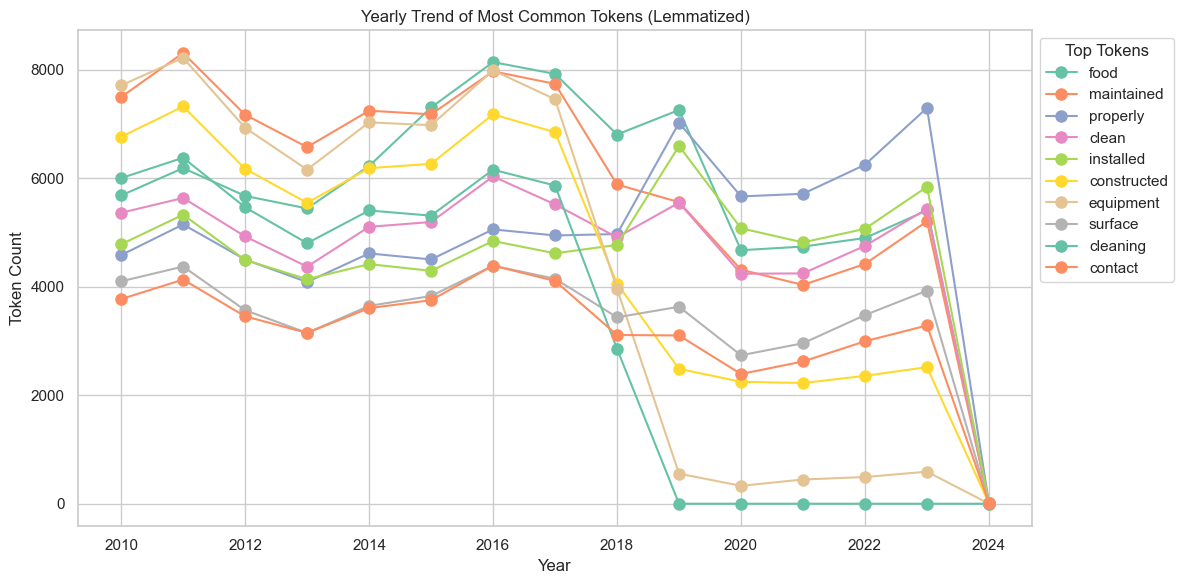

In [85]:
InspectionFail['Inspection Date'] = pd.to_datetime(InspectionFail['Inspection Date'])
InspectionFail['Year'] = InspectionFail['Inspection Date'].dt.year
top_tokens = [token for token, count in top_10_lemmatized_description.items()]
yearly_counts = pd.DataFrame(index=InspectionFail['Year'].unique(), columns=top_tokens).fillna(0)
for token in top_tokens:
    yearly_data = InspectionFail[InspectionFail['lemmatized_tokens_description'].apply(lambda x: token in x)]
    counts = yearly_data.groupby('Year').size()
    yearly_counts[token] = counts.reindex(yearly_counts.index, fill_value=0)

yearly_counts.sort_index(inplace=True)  
sns.set(style="whitegrid")
palette = sns.color_palette("Set2", n_colors=len(top_tokens))
plt.figure(figsize=(12, 6))

for i, token in enumerate(top_tokens):
    plt.plot(yearly_counts.index, yearly_counts[token], label=token, marker='o', linestyle='-', color=palette[i], markersize=8)

plt.title('Yearly Trend of Most Common Tokens (Lemmatized)')
plt.xlabel('Year')
plt.ylabel('Token Count')
plt.legend(title='Top Tokens', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

The graph shows the yearly frequency of the most common tokens found in regulation descriptions for failed food inspections in Chicago from 2010 to 2024. The tokens are lemmatized, which means that they have been reduced to their base form.

The top five most common tokens in each year are listed on the right side of the graph. For example, in 2010, the top five tokens were "food", "maintained", "properly", "clean", and "installed".

**Observation:**
The overall frequency of tokens has increased over time. This could be due to a number of factors, such as an increase in the number of food inspections, an increase in the number of violations per inspection, or a change in the way that violations are recorded.
The top five tokens have changed over time. This could be due to changes in the regulations themselves, or changes in the practices of food establishments.
There is a sharp increase in the frequency of the token "food" in 2016. This could be due to a specific event or change in regulations that occurred in that year.